Week 3: Simple Linear Regression
=========



## **Notebook Overview**

This notebook is available on github
[here](https://github.com/Yushi-Y/AAS-ongoing-tutorials). If you find
errors or would like to suggest an improvement then let me know.

Some of the questions in this notebook are on simple linear regression (SLR). The other questions are on confidence intervals in general (not in the case of regression). These are exploring last week's content in a bit more detail so come to these once you've finished everything else.

The confidence interval questions are helpful. I would also recommend spending some time to understand hypothesis testing because this is probably more useful to your research than confidence intervals. You will almost certainly need to use a hypothesis test in your summative. I'm not sure you could really do much statistics without using a hypothesis test. I haven't got any questions on hypothesis testing here but take some time to read about it in a textbook or watch one of the videos. There are also some questions on Adam's problem set.

### **Additional Resources**

1. **[Useful Ben Lambert Videos:](https://www.youtube.com/playlist?list=PLwJRxp3blEvZyQBTTOMFRP_TDaSdly3gU)** First up a good one for the real basics of what linear regression is trying to do - [here](https://www.youtube.com/watch?v=KIQbe-FJoa8&list=PLwJRxp3blEvZyQBTTOMFRP_TDaSdly3gU&index=12). This starts from a really basic level. I would also recommend looking at [this one](https://www.youtube.com/watch?v=YL-NNb4gojA&list=PLwJRxp3blEvZyQBTTOMFRP_TDaSdly3gU&index=13), which is about the logic of linear regression and minimising the sum of squared errors. It's a bit more maths heavy but the theory is important.

  A really key one is [interpreting coefficients within linear regression](https://www.youtube.com/watch?v=JwGaos2Y9bM). Very useful for your research. if you want to understand why linear regression is so good compared to other methods then see [here](https://www.youtube.com/watch?v=vOBtEiij-fA&list=PLwJRxp3blEvZyQBTTOMFRP_TDaSdly3gU&index=14). This is a video about the properties of the estimators and how they are BLUE (the best linear unbiased estimators). It's a good one for seeing the beauty of linear regression and the content isn't covered in the lecture notes.

  Also one on [hypothesis testing for linear regression](https://www.youtube.com/watch?v=fZV4ntLEPlU) - there are a few different parts to this.
  
  There are also a couple of good *general* videos on hypothesis testing too. This is content from the last set of lecture slides which was breifly covered at the start of the lecture. [Hypothesis testing intuition](https://www.youtube.com/watch?v=_dULun-EpX0). Also an explanation of when to use the t-distribution: [Hypothesis testing with the t-distribution](https://www.youtube.com/watch?v=46SqMrzQQ2w). There are lots more useful ones as well so have a look through them.

  One on confidence intervals [here](https://www.youtube.com/watch?v=MFqWrhWQgXo&t=107s). It is done in terms of the parameters of a linear regression so is pretty useful for doing research.

2. **Other YouTube Videos:** [Introduction to the t-distribution](https://www.youtube.com/watch?v=Uv6nGIgZMVw&t=304s)

3. **[Wooldridge Econometrics:](https://www.academia.edu/44467534/ECONOMETRICS_A_Modern_Approach) [Best resource for really understanding the theory]** Chapter 2 is well worth having a look at. Page 20 and 21 explain all of the terms without assuming any background knowledge. This is really helpful if you haven't come across regression before. It does it to a more technical level but useful. Quite maths heavy but it's good to understand the theory to a deep level.

4. **Fox Textbook:** Starts with simple linear regression and assumes no background knowledge. Also a good resource for theory.

As usual we will start by importing some useful libraries.

In [1]:
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

## **Simple Linear Regression Worked Example**

The data in `data-auto.csv` is a popular dataset of car characteristics. We will be looking at the horsepower and miles per gallon (MPG) obtained by these cars. The model we will consider in this notebook is a simple linear regression:

$$
\text{mpg}_{i} = \alpha + \beta \text{horsepower}_{i} + \epsilon_{i}
$$

where the $\epsilon_{i}$ are IID normal fluctuations. We will estimate the parameters $\alpha$ and $\beta$.

In [2]:
# Read in the data from GitHub
data_url = "https://raw.githubusercontent.com/Yushi-Y/AAS-ongoing-tutorials/main/W3-Simple_Linear_Regression/data-auto.csv"
df = pd.read_csv(data_url)

# Define our dependent and independent variables
y = df["mpg"].to_numpy()
x = df["horsepower"].to_numpy()

# Generate the means (useful for later)
y_bar = y.mean()
x_bar = x.mean()

### Question 1

Plot the horsepower and MPG, describe the relationship between these variables.

### Answer

As the horsepower increases the car gets fewer MPG.

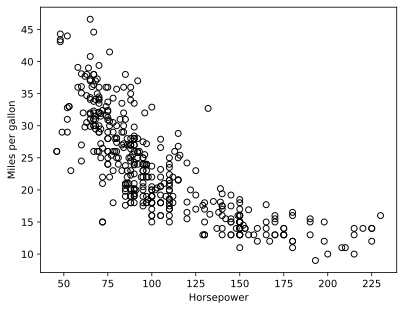

In [3]:
plt.figure()
plt.scatter(x, y, marker='o', facecolor='none', edgecolor='k')
plt.xlabel("Horsepower")
plt.ylabel("Miles per gallon")
plt.show()

### Question 2

Using the formula you saw in lectures, calculate the least squares estimates $\hat{\beta}$ and $\hat{\alpha}$

### Answer

In [4]:
beta_hat = np.sum((x - x_bar) * (y - y_bar)) / np.sum((x - x_bar) * (x - x_bar))
alpha_hat = y_bar - beta_hat * x_bar

### Question 3

Using your parameter estimates, calculate the expected values for the MPG, $\hat{y}_{i}$, and the residuals, $e_{i}$.

### Answer

In [5]:
y_hat = alpha_hat + beta_hat * x
residuals = y - y_hat

### Question 4

Plot the model fit and the residuals. Are the assumptions (linearity, constant variance and independenc) of the model valid? What does the model predict would be the MPG for a car with the power of 400 horses?

### Answer

The MPG does not vary linearly with the horsepower, we will learn how to address
this later in the course. Extending the regression to a horsepower of 400
produces a negative estimate of MPG which clearly does not make sense.

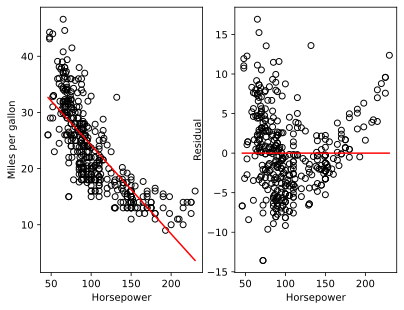

In [6]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(x, y, marker='o', facecolor='none', edgecolor='k')
axs[0].plot(x, y_hat, color='r')
axs[0].set_xlabel("Horsepower")
axs[0].set_ylabel("Miles per gallon")
axs[1].scatter(x, residuals, marker='o', facecolor='none', edgecolor='k')
axs[1].plot(x, np.repeat(0, x.size), color='r')
axs[1].set_xlabel("Horsepower")
axs[1].set_ylabel("Residual")
plt.show()

### Question 5

Calculate the correlation coeffient, and $R^{2}$.

### Answer

In [7]:
corr_coef = np.sum((x - x_bar) * (y - y_bar)) / (np.sqrt(np.sum((x - x_bar) * (x - x_bar))) * np.sqrt(np.sum((y - y_bar) * (y - y_bar))))

total_sum_sqrs = np.sum((y - y_bar)**2)
reg_sum_sqrs = np.sum((y_hat - y_bar)**2)
res_sum_sqrs = np.sum((y - y_hat)**2)

r_sqrd = 1 - res_sum_sqrs / total_sum_sqrs

print(r_sqrd)
print(corr_coef**2)

0.6059482578894348
0.6059482578894345


### Question 6

Calculate the confidence intervals on your estimates. Is the result significant?

### Answer

We use the _t_-distribution with $n-2$ degrees of freedom to compute the
confidence intervals because we needed to estimate the residual standard error
and two degrees of freedom where used to estimate the coefficients of the linear
model.

Yes, the coefficients are both significantly different from zero.

In [8]:
n = df.shape[0]
sigma_hat = np.sqrt(res_sum_sqrs / (n - 2))

s_x = np.sum(x**2)
s_xx = np.sum((x - x_bar)**2)

var_beta_hat = sigma_hat**2 / s_xx

var_alpha_hat = sigma_hat**2 * s_x / (n * s_xx)

t_val = stats.t.ppf(0.975, df = n-2)

alpha_ci = (
    alpha_hat - t_val * np.sqrt(var_alpha_hat),
    alpha_hat + t_val * np.sqrt(var_alpha_hat)
)

beta_ci = (
    beta_hat - t_val * np.sqrt(var_beta_hat),
    beta_hat + t_val * np.sqrt(var_beta_hat)
)

print(alpha_ci)
print(beta_ci)

(38.525211789229616, 41.34651025311132)
(-0.17051700846435697, -0.14517245824295028)


## **Introduction to** `statsmodels`

We are finally ready to use the `statsmodel` package. In the following code we perform ordinary least squares regression and print out a summary. You can see that all of the estimates agree with those we calculated above.

In [9]:
my_lm = smf.ols("mpg ~ horsepower", df).fit()
print(my_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           7.03e-81
Time:                        15:59:13   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

If you have used STATA or R before then output like this will look pretty familiar. Here we are given A LOT of data so we have to be a bit selective in what we actually want.

The most important part is the middle section with the estimated regression coefficients (coef), the standard errors (std err), the test statistics ($t$), the p-values (P>|t|) and a 95% confidence interval. The test statistic and p-value is based on a hypothesis test that the true coefficient is in fact 0. It starts with the assumption that the true coefficient is 0 and considers the probability of getting these results given that. In this case, the probability is approximately 0.000 for both coefficient indicating that there is sufficient evidence to reject this initial hypothesis.

In practice you rarely need to do a hypothesis by hand because the results are given straight to you in regression output. However, it is critical to understand what is going on behind the scenes.

The output also has a lot of results from other common regression diagnosis tests (some are covered in future lectures).

## **Confidence Intervals and understanding the t-distribution**

If we have a sample from a normal distribution with sample mean $\bar{x}$ and
known the standard deviation, $\sigma$, the $(1-\alpha)100\%$ CI for the
estimate of the mean is

$$
\bar{x} \pm z_{\alpha / 2} \frac{\sigma}{\sqrt{n}}
$$

where $z_{\alpha / 2}$ comes from the inverse CDF of the normal distribution. You can look up its value in a book of statistical tables, online or on most modern scientific calculators. Commonly you'll want to find the $z_{\alpha / 2}$ associated with the 95% or 99% confidence intervals.


### Question 7

Simulate a set of 5 draws from a $N(1,1)$ distribution and, assuming the
standard deviation is known, check if the $95\%$ CI contains the true mean. To do this you  have to work out the confidence interval based on your sample. Tip: define a function to do this because we will use it in future questions.

### Answer

In [10]:
def f1():
    n = 5
    x_bar = stats.norm.rvs(loc = 1.0, scale = 1.0, size = n).mean()
    # Percent Point Function (Inverse of CDF).
    z_a2 = stats.norm.ppf(0.975)
    lower_lim = x_bar - z_a2 * 1.0 / np.sqrt(n)
    upper_lim = x_bar + z_a2 * 1.0 / np.sqrt(n)
    return lower_lim <= 1 and 1 <= upper_lim

print(f1())

True


### Question 6

Now repeat this process (simulating 5 draws and checking if the CI contains the true mean) 1000 times and check how many times it contains the true
mean. Do you think the coverage of the CI will be correct and why? Tip: read about coverage [here](https://en.wikipedia.org/wiki/Coverage_probability).

### Answer

Because we have used the true standard deviation this should get the coverage correct.

In [11]:
good_ci_count = 0
for _ in range(1000):
    if f1():
        good_ci_count += 1
print(good_ci_count / 1000)

0.955


### Question 7

Now repeat this 1000-fold repetition using the *sample* standard deviation instead of the true standard deviation but treat it as though it is known, ie continue with $z_{\alpha / 2}$. Now do you think the coverage of the CI will be correct and why? Tip: you will have to adjust you confidence interval using the sample standard deviation rather than 1. For the purpose of demonstration, continue to use the normal distribution.

### Answer

Because we have not accounted for the additional uncertainty from our estimate of the standard deviation our CI will be too small and the coverage of the CI will not be as high as desired. This is bad!

In [12]:
def f2():
    n = 5
    random_sample = stats.norm.rvs(loc = 1.0, scale = 1.0, size = n)
    x_bar = random_sample.mean()
    s = np.sqrt(np.sum((random_sample - x_bar)**2) / (n-1))
    z_a2 = stats.norm.ppf(0.975)
    lower_lim = x_bar - z_a2 * s / np.sqrt(n)
    upper_lim = x_bar + z_a2 * s / np.sqrt(n)
    return lower_lim <= 1 and 1 <= upper_lim

good_ci_count = 0
for _ in range(1000):
    if f2():
        good_ci_count += 1
print(good_ci_count / 1000)

0.871


### Question 8

Now repeat this process while accounting for the uncertainty in the standard error, ie use the $t_{\alpha / 2}$. This is called the _t_-distribution and is used in place of the normal distribution when we have to estimate the standard deviation (note that for $n$ larger than 40 the _t_-distribution is similar to the normal distribution so continuing to use the normal distribution is not a big deal). How many degrees of freedom should you use to calculate your confidence interval? Do you think the coverage of the CI will be correct?

### Answer

We use $n-1 = 4$ degrees of freedom in the _t_-distribution. The coverage should be correct because we are using the correct model. Because we're estimating the standard deviation **and** $n$ is small we need to use the _t_-distribution rather than the normal dist.

In [13]:
def f3():
    n = 5
    random_sample = stats.norm.rvs(loc = 1.0, scale = 1.0, size = n)
    x_bar = random_sample.mean()
    s = np.sqrt(np.sum((random_sample - x_bar)**2) / (n-1))
    # here we use the t-distribution to understand the uncertainty.
    df = n - 1
    t_a2 = stats.t.ppf(0.975, df)
    lower_lim = x_bar - t_a2 * s / np.sqrt(n)
    upper_lim = x_bar + t_a2 * s / np.sqrt(n)
    return lower_lim <= 1 and 1 <= upper_lim

good_ci_count = 0
for _ in range(1000):
    if f3():
        good_ci_count += 1
print(good_ci_count / 1000)

0.947


## **Confidence Intervals (Extension)**

### Parameter estimation of the binomial distribution

We want to make an *estimate* of the probability that a coin comes up
heads. We also want to understand the level of confidence we have in
this estimate; we use a *confidence interval* (CI) to describe the range
of values we are confident the \"true\" probability of heads lies
within.

Binomial random variables can be used to model the number of times a
coin comes up heads when flipped $n$ times. Let $X$ be a binomial random
variable (RV) representing the number of heads that are observed when a
coin is flipped $n$ times and the probability of coming up heads is $p$.
We assume that $n$ is known but $p$ is unknown.

The expected value of $X$, ie the average number of times that the coin
comes up heads, is $np$ ($E[X]$ of the binomial distribution). So a simple way to estimate $p$ is to divide
the number of heads, $X$, by the number of flips, $n$. This gives the
estimate

$$
\hat{p} = X / n.
$$

This estimator is called the [the method of
moments](https://en.wikipedia.org/wiki/Method_of_moments_(statistics)). This is
also an example of a maximum likelihood estimate (MLE). Read more about this if you're interested in it.

Given an estimator, such as $\hat{p}$, we usually want to quantify the
uncertainty. One way to construct a CI is to approximate the sampling
distribution by a normal distribution. This is a bit crude but valid when $n$ is large. The estimated standard error of $\hat{p}$ is
$\sqrt{\hat{p}(1-\hat{p})/n}$, so the CI is given by

$$
\hat{p} \pm z \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

where $z$ is the appropriate quantile of the standard normal distribution. In
the case of a $95\%$ distribution this value is $1.96$.

### Question 9

State the limitations on the estimator we are using for the CI.

### Question 10

Implement a function called `estimate_and_ci` which takes two
arguments: `num_trials` which is $n$ in the description above, and
`num_success` which is $X$ above. The function should return
`(p_hat,(ci_lower,ci_upper))` where `p_hat` is $\hat{p}$ and
`ci_x` are the limits of the $95\%$ CI.

### Answer

In [14]:
def estimate_and_ci(num_trials, num_success):
    p_hat = num_success / num_trials
    z = 1.96
    delta = z * np.sqrt(p_hat * (1 - p_hat) / num_trials)
    return (p_hat,(p_hat - delta, p_hat + delta))

### Question 11

Simulate a binomial random variable with $n=100$ and $p=0.6$. Then use
the value and the `estimate_and_ci` function to see how well you
can estimate $p$. Write a couple of sentences to explain this.

Recall that in a previous example we have looked at how to simulate
random variables using `scipy.stats`.

### Question 12

Repeat the process from the previous question 100000 times and see what
proportion of the CIs capture the true value of $p$. Is it what you
expect? Write a couple of sentences to explain what you found.

### Answer

In [15]:
num_trials = 100
num_repeats = 100000
rand_xs = stats.binom.rvs(n = num_trials, p = 0.6, size = num_repeats)

def ci_contains_value(ci, p):
    lower,upper = ci
    return lower < p and p < upper

in_ci_count = 0
for x in rand_xs:
    _, ci = estimate_and_ci(num_trials, x)
    if ci_contains_value(ci, 0.6):
        in_ci_count += 1

print(in_ci_count / num_repeats)

0.94819
